<h1 align="center">EQE512 MATRIX METHODS IN STRUCTURAL ANALYSIS 
<br>
<br>
Week 11
<br>
<br>
Dynamic characteristics of the systems and application in Earthquake Engineering (MDOF)</h1> 

<h3 align="center">Dr. Ahmet Anıl Dindar (adindar@gtu.edu.tr)</h3> 
<h4 align="center">2021 Fall  </h4> 

---
**Today's Topics**

This code is composed of three sections, namely 

A. Pre-process

B. Process

C. Post-Process

---

Problem: This is a multistory 2D Elastic RC frame under static loads

---

# A. Pre-Process

In [58]:
# from openseespy import *

import openseespy.opensees as ops

In [59]:
ops.wipe() # Clear all OS values

In [60]:
ops.model( "Basic", "-ndm", 2 , "-ndf", 3) # This is a 2D Frame

In [61]:
numBay = 2
numFloor = 3

In [62]:
bayWidht = 3.0 # m
storyHeight = 3.0 # m

In [63]:
E = 295000000 # kN/m2
massX = 0.49
M = 0. 
coordTransfer = "Linear" # Linear Transformation
massType = "-lMass" # Lumped mass

In [64]:
beams = [ "B20X50" for item in range( numFloor)]
eColumn = [ "C50X50" for item in range( numFloor)]
iColumn = [ "C50X50" for item in range( numFloor)]

columns = [eColumn , iColumn , eColumn]

In [65]:
Section = { "C50X50" : [ 0.5 * .5 , (0.5*0.5**3)/12],
          "B20X50": [0.2*.5 , (.2*0.5**3)/12]}

In [66]:
Section

{'C50X50': [0.25, 0.005208333333333333],
 'B20X50': [0.1, 0.0020833333333333333]}

In [67]:
def ElasticBeamColum( eleTag, iNode, jNode, sectType, E, transfTag, M, massType) :
    
    prop = Section[sectType]
    Area = prop[0]
    I = prop[1]
    
    ops.element( "elasticBeamColumn", eleTag ,iNode, jNode, Area, E , I , transfTag , "-mass", M, massType)

In [68]:
import numpy as np
axis_h = np.linspace( 0 , (numBay * bayWidht)  ,numBay+1)
axis_v = np.linspace( 0 , (numFloor * storyHeight)  ,numFloor+1)


In [69]:
node_no =  1
node_dict = {}
floorNo = 0
floorNodes = {}
nodes = []
for i in axis_v:
    floorNodes[floorNo] = []
    
    for j in axis_h:
        nodes.append(node_no)

        # OPENSEES COMMAND
        ops.node( node_no , float(j) , float(i))
        
        node_dict[node_no] = [float(j) , float(i)]
        floorNodes[floorNo].append(node_no)
        
        
        node_no += 1
    floorNo += 1

In [70]:
for nodeNumber in floorNodes[0]:
    ops.fix( nodeNumber , 1,1,1)

In [71]:
# Rigid Diaphram Assignment
floorNodes

{0: [1, 2, 3], 1: [4, 5, 6], 2: [7, 8, 9], 3: [10, 11, 12]}

In [72]:
for key, value in floorNodes.items():
    for item in value[:]:
        if item == value[0]:
            ops.mass( item , massX , 0.000001 , 0.0000001 )
        else: 
            ops.equalDOF( value[0] , item , 1)

Adding columns

In [73]:
ops.geomTransf(coordTransfer, 1)
column_dict = {}
eleTag = 1 
for  j in range(0 , numBay + 1):
    end1 = j + 1
    end2 = end1 + numBay + 1
    thisColumn = columns[j]
    
    for i in range( 0 ,numFloor):
        secType = thisColumn[ i]
        ElasticBeamColum( eleTag, end1 , end2 , secType , E , 1, M , massType)
        column_dict[eleTag] = [end1, end2]
        end1 =end2
        end2 += numBay + 1
        eleTag += 1        

In [74]:
eleTag

10

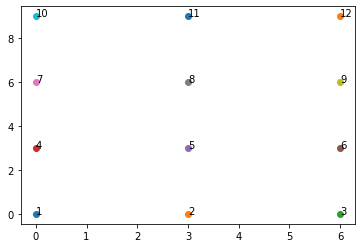

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

for key in node_dict.keys():
    plt.plot( node_dict[key][0] ,  node_dict[key][1] , "o"  )
    plt.text( node_dict[key][0] ,  node_dict[key][1] , str(key) ,  )

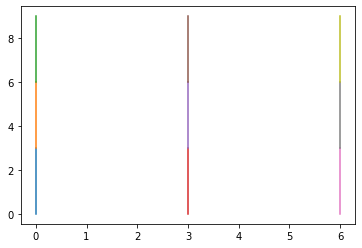

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

for key in column_dict.keys():
    plt.plot([ node_dict[column_dict[key][0]][0] ,node_dict[column_dict[key][1]][0]],
              [ node_dict[column_dict[key][0]][1] ,node_dict[column_dict[key][1]][1]]  )
    

In [77]:
beam_dict = {}
for j in range( 1 , numFloor +1):
    end1 = (numBay + 1) * j + 1
    end2 = end1+1
    secType = beams[j -1 ]
    for i in range(0, numBay):
        ElasticBeamColum(eleTag, end1, end2, secType, E, 1, M, massType) 
        beam_dict[eleTag] = [end1, end2]
        end1 = end2
        end2 = end1 + 1
        eleTag += 1

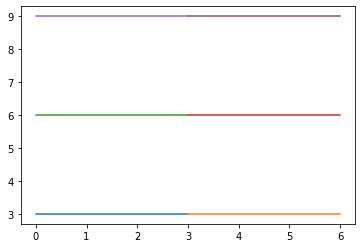

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

for key in beam_dict.keys():
    plt.plot([ node_dict[beam_dict[key][0]][0] ,node_dict[beam_dict[key][1]][0]],
              [ node_dict[beam_dict[key][0]][1] ,node_dict[beam_dict[key][1]][1]]  )
    

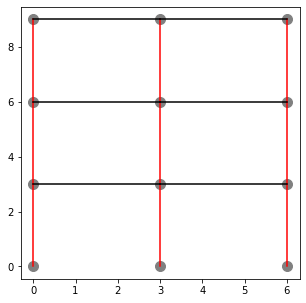

In [79]:
plt.figure(figsize= (5,5))


for key in node_dict.keys():
    plt.plot( node_dict[key][0] ,  node_dict[key][1] , "o" , MS = 10 , color="gray")
for key in column_dict.keys():
    plt.plot([ node_dict[column_dict[key][0]][0] ,node_dict[column_dict[key][1]][0]],
              [ node_dict[column_dict[key][0]][1] ,node_dict[column_dict[key][1]][1]]  
            , color="red")
for key in beam_dict.keys():
    plt.plot([ node_dict[beam_dict[key][0]][0] ,node_dict[beam_dict[key][1]][0]],
              [ node_dict[beam_dict[key][0]][1] ,node_dict[beam_dict[key][1]][1]] 
            , color="k")
    

In [80]:
from math import asin, sqrt


numEigen = numFloor
eigenValues = ops.eigen( numEigen) 

PI = 3.14

In [81]:
eigenValues

[253945.04221043308, 3037243.0114364256, 10942995.574245013]

In [82]:
for i in eigenValues:
    print( 2*3.14/(sqrt( i )))

0.012462058181108964
0.003603461389418709
0.0018984166401965095


No Model_ODB specified to plot modeshapes
2D model


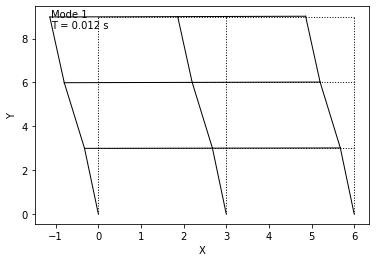

No Model_ODB specified to plot modeshapes
2D model


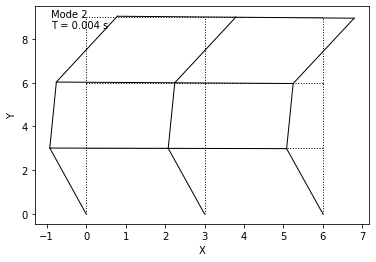

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fffffc87f0>)

In [111]:
import openseespy.postprocessing.Get_Rendering as opsplt

opsplt.plot_modeshape(1, 1) # 1st Mode Shape
opsplt.plot_modeshape(2, 1) # 2nd Mode Shape

**Now think of the eigenvector**

In [109]:
mode_shape = []
for i in [1,4,7,10]:
    value = ops.nodeEigenvector( i , 2 )[0]
    mode_shape.append( value)
print( mode_shape )

[0.0, 0.9201208781005956, 0.7538512929487384, -0.7911397199499888]


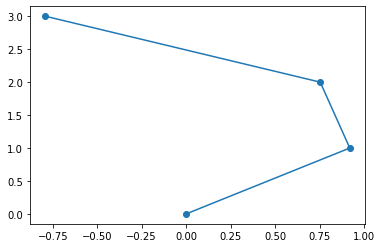

In [110]:
plt.plot(  mode_shape , range( len(mode_shape)) ,  marker = "o")

# B. Process

# C. Post-Process

---

**NEXT WEEK**
The topics for the next week 

- Loads and solution